In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
# Set max columns to display
pd.set_option('display.max_columns', None)

In [42]:
#df_outlierHandling = pd.read_csv('/workspaces/codespaces-jupyter/Final Machine/Interpolated LIMS/df_outlierHandling.csv')

df_outlierHandling = pd.read_csv(r"C:\Users\saust\OneDrive\Desktop\GitRepo\Project-OptiC4\1 Preprocess\Continuous Data\adjusted_Limits.csv")

# Print descriptive statistics for df_outlierHandling
df_outlierHandling.describe()

425_pct_Al       M_Value    C4_pct_Eth    C4_pct_H2O       Butanol  \
count  66814.000000  66814.000000  66814.000000  66814.000000  66814.000000   
mean       4.335104      3.637638      1.448415     20.983292     11.560786   
std      109.236487      0.732475      2.697047      4.421187     15.599728   
min    -9730.860000      0.571967      0.001000      0.057000      0.000000   
25%        5.991390      3.508332      0.684172     18.337725      3.571670   
50%        6.137015      3.598720      1.304895     20.819850      5.750000   
75%        6.291750      3.700338      1.764115     22.998775     11.510000   
max        8.058320     30.115400     77.165000     95.818000     99.950000   

       HydWtr_pct_Ammonia       DI55152       FC55003       FC55552  \
count        66814.000000  66814.000000  6.681400e+04  66814.000000   
mean             0.987209      0.943680  5.948377e+03  35341.550491   
std              0.204888      0.042955  1.033866e+03   5505.443684   
min              0.063109      0.000000  1.930000e-17   6376.690000   
25%              0.877390      0.915073  5.377163e+03  33955.800000   
50%              0.946312      0.939149  5.953580e+03  37561.400000   
75%              1.049028      0.965686  6.530233e+03  38953.300000   
max              3.744840      1.070140  1.470590e+04  52000.000000   

            FC55569      FFC55553      FFC55555       LC55555       PI55004  \
count  66814.000000  66814.000000  66814.000000  66814.000000  66814.000000   
mean    6614.274132      0.989798      0.773793     58.715883      2.351955   
std      481.872839      0.059929      0.027328     10.579809      1.324980   
min        0.000000      0.042564      0.000000      0.000000      0.000000   
25%     6343.130000      0.969304      0.759333     49.872600      1.319260   
50%     6574.400000      0.991472      0.777559     60.172050      2.084360   
75%     6826.135000      1.016637      0.790018     67.836200      3.172285   
max    10503.000000      1.475490      1.000000     99.818500     12.531800   

            TC55552       TI55021  
count  66814.000000  66814.000000  
mean     167.817923    223.977927  
std       15.894613     10.872105  
min       98.687500      0.000000  
25%      155.458000    217.887000  
50%      171.453000    221.101000  
75%      180.307000    225.231750  
max      213.521000    344.636000

In [43]:
num_columns = df_outlierHandling.shape[1]
print("Number of features:", num_columns)

Number of features: 17


In [44]:
# # Assuming df_outlierHandling is your DataFrame
# non_date_columns = df_outlierHandling.columns[df_outlierHandling.columns != 'Date']

# # Drop rows where any value (excluding 'Date') is 0 or less
# df_outlierHandling = df_outlierHandling.drop(df_outlierHandling[(df_outlierHandling[non_date_columns] <= 100).any(axis=1)].index)

# df_outlierHandling



In [45]:
df_outlierHandling['Date'] = pd.to_datetime(df_outlierHandling['Date'])
print(df_outlierHandling.dtypes)

# Output after conversion:
# date_datetime64    datetime64[ns]
# date_object        datetime64[ns]
# dtype: object


Date                  datetime64[ns]
425_pct_Al                   float64
M_Value                      float64
C4_pct_Eth                   float64
C4_pct_H2O                   float64
Butanol                      float64
HydWtr_pct_Ammonia           float64
DI55152                      float64
FC55003                      float64
FC55552                      float64
FC55569                      float64
FFC55553                     float64
FFC55555                     float64
LC55555                      float64
PI55004                      float64
TC55552                      float64
TI55021                      float64
dtype: object


Skipping datetime column: Date


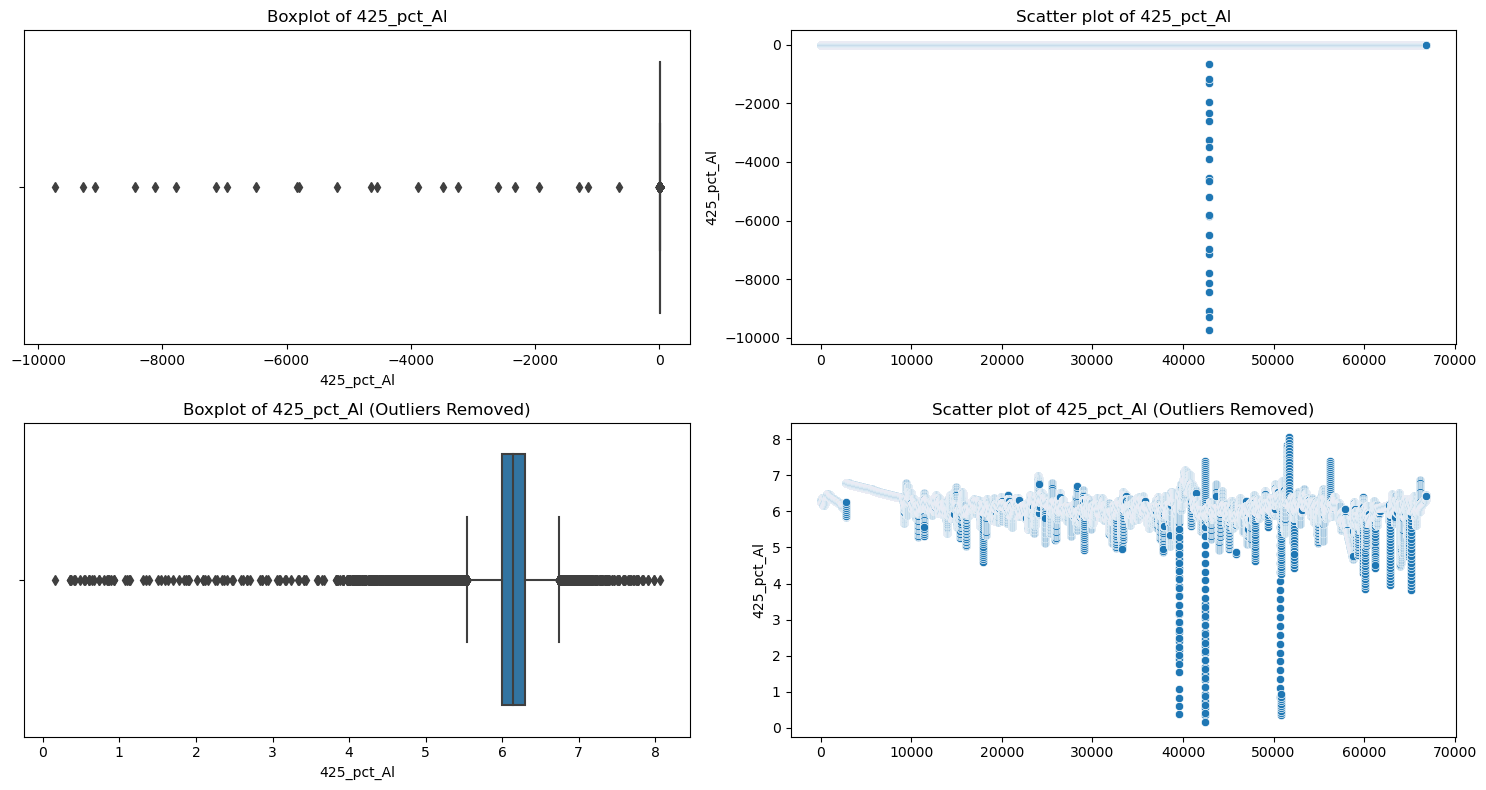

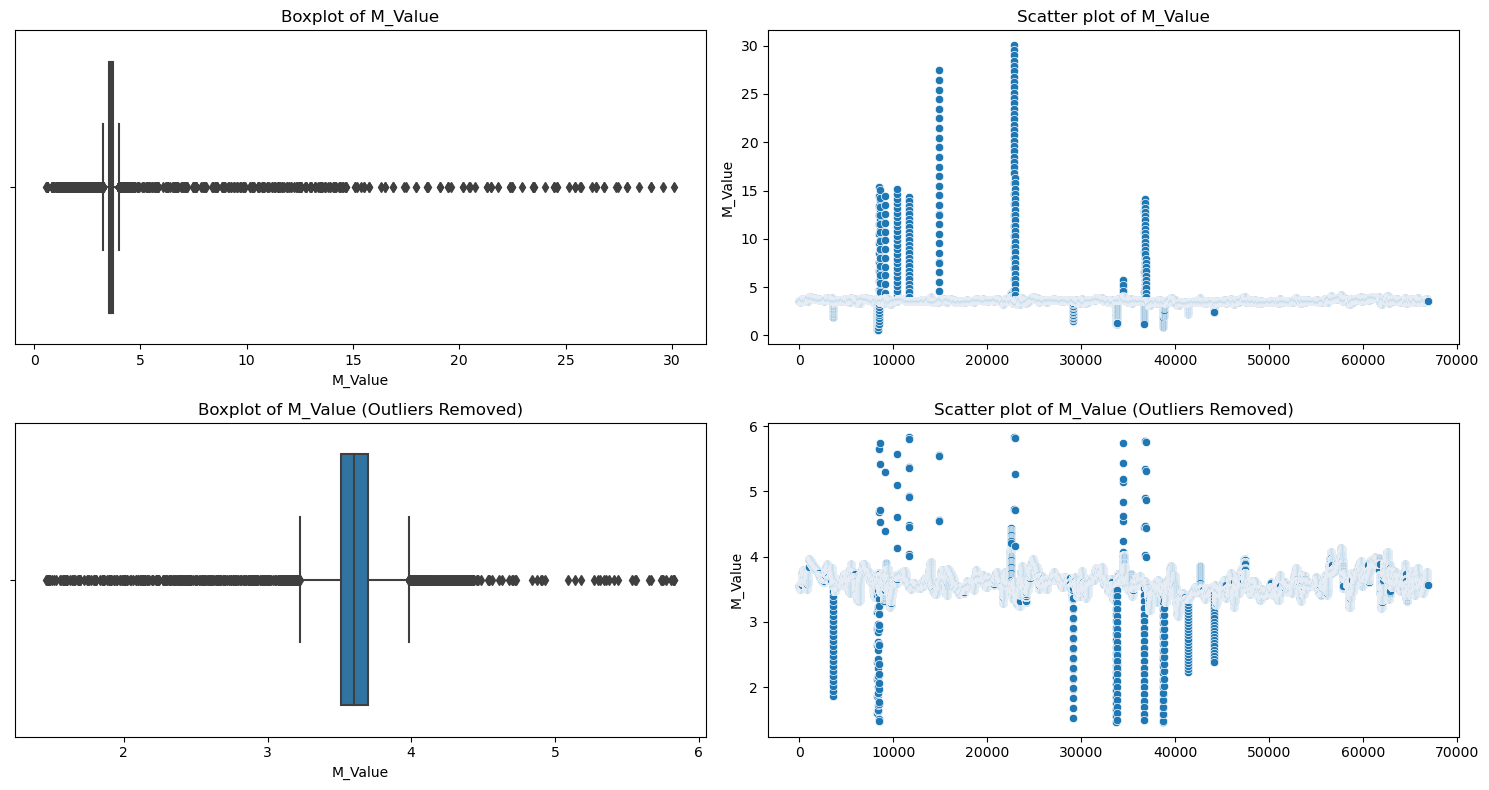

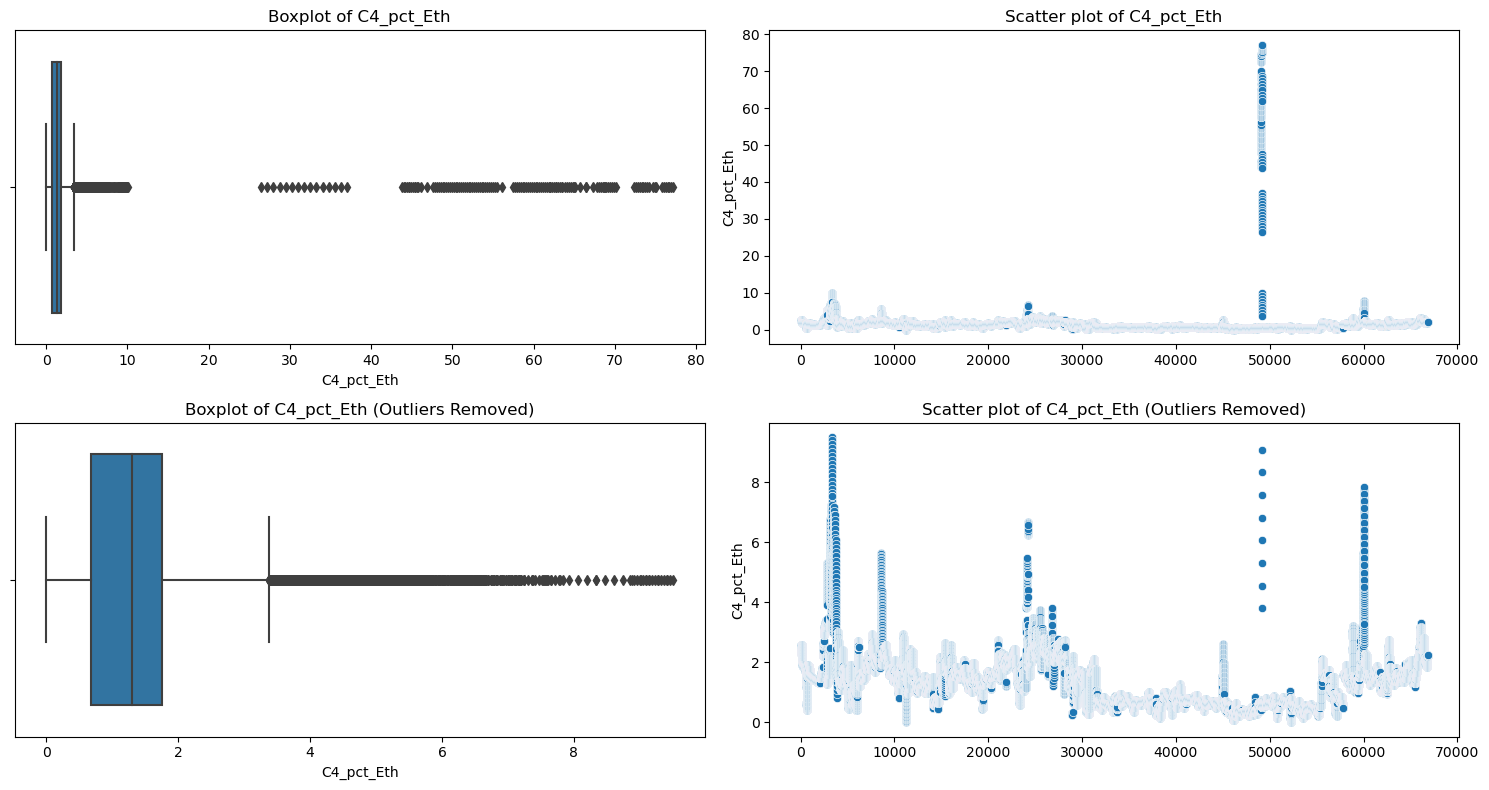

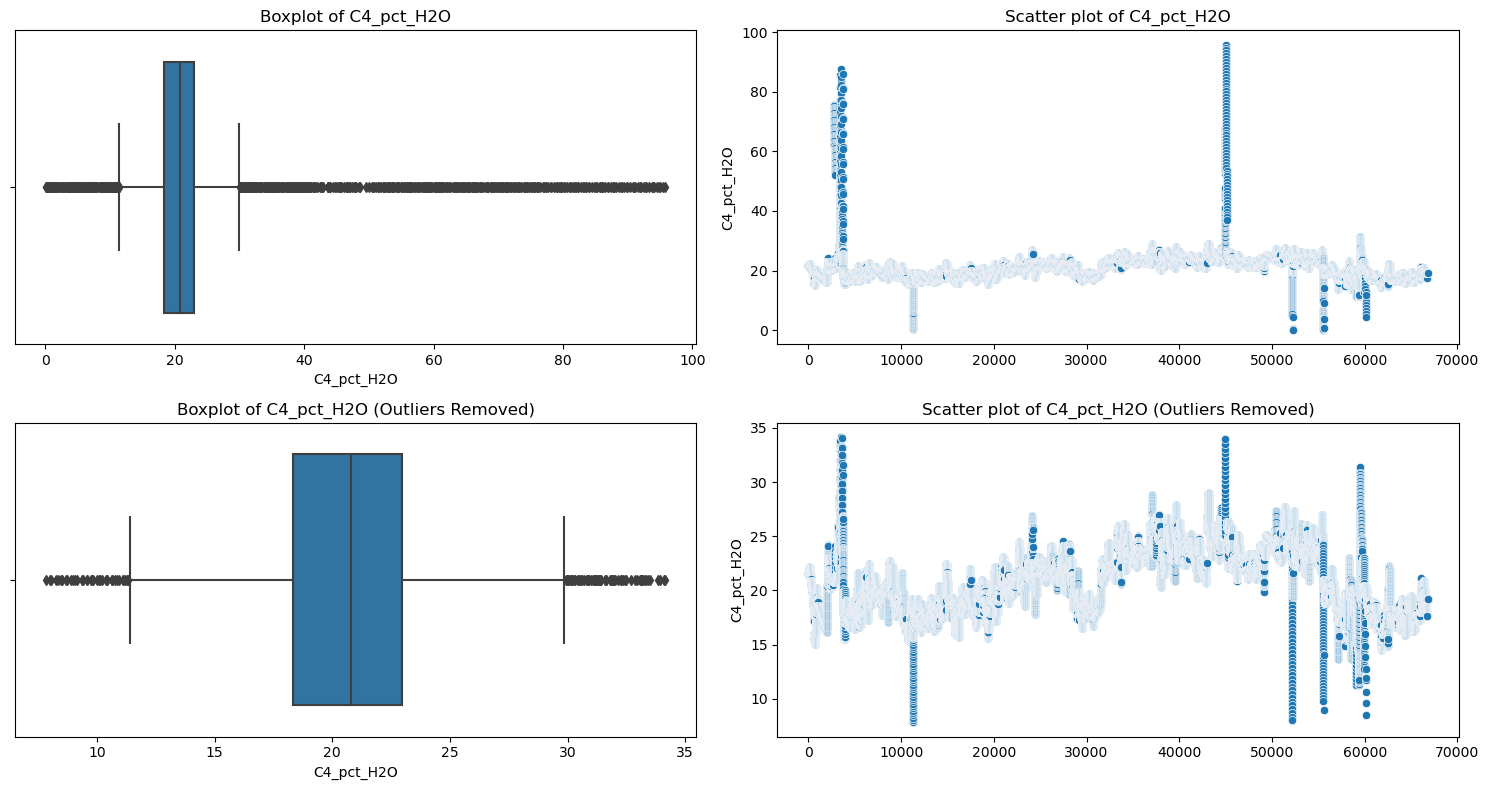

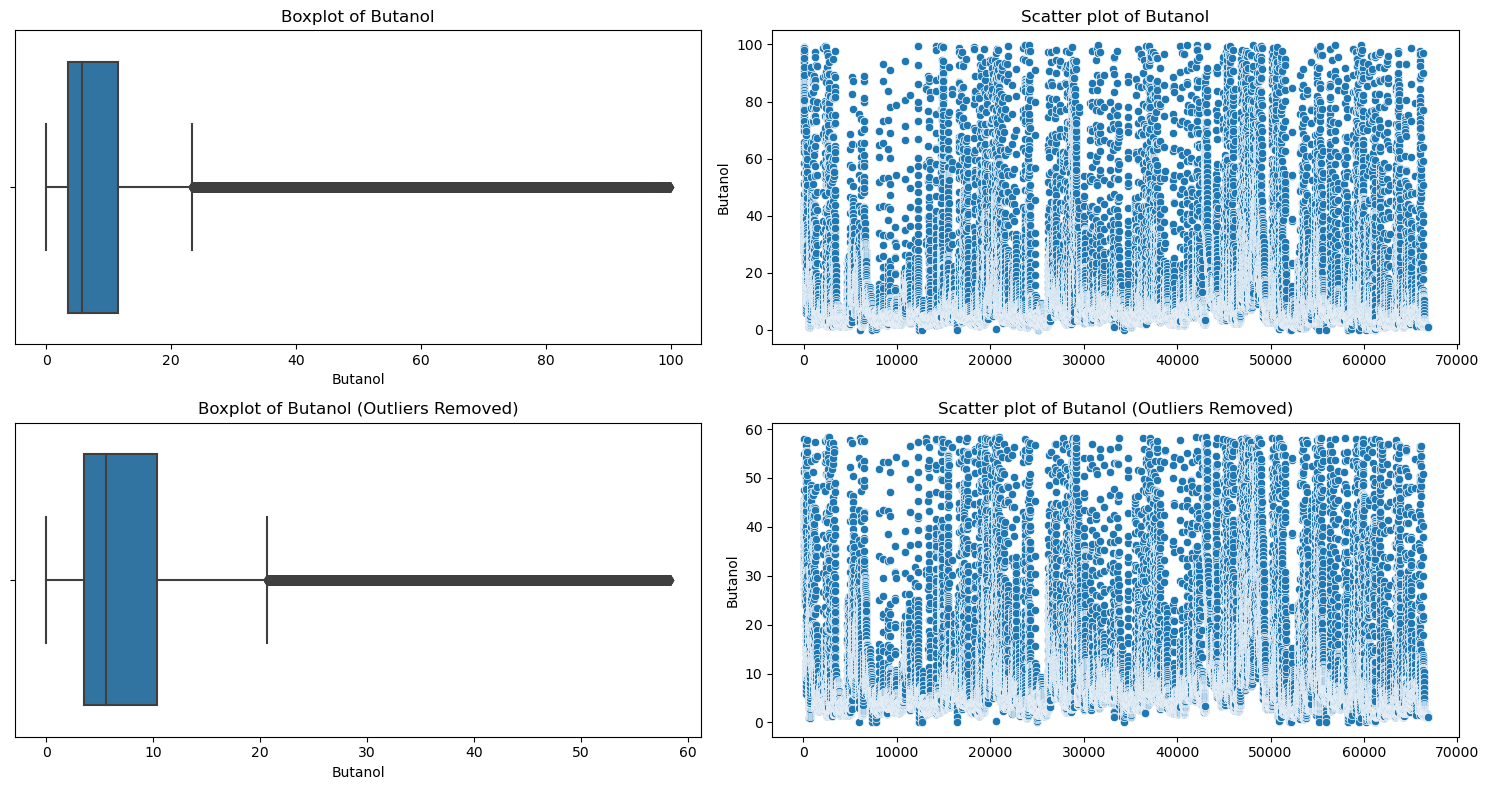

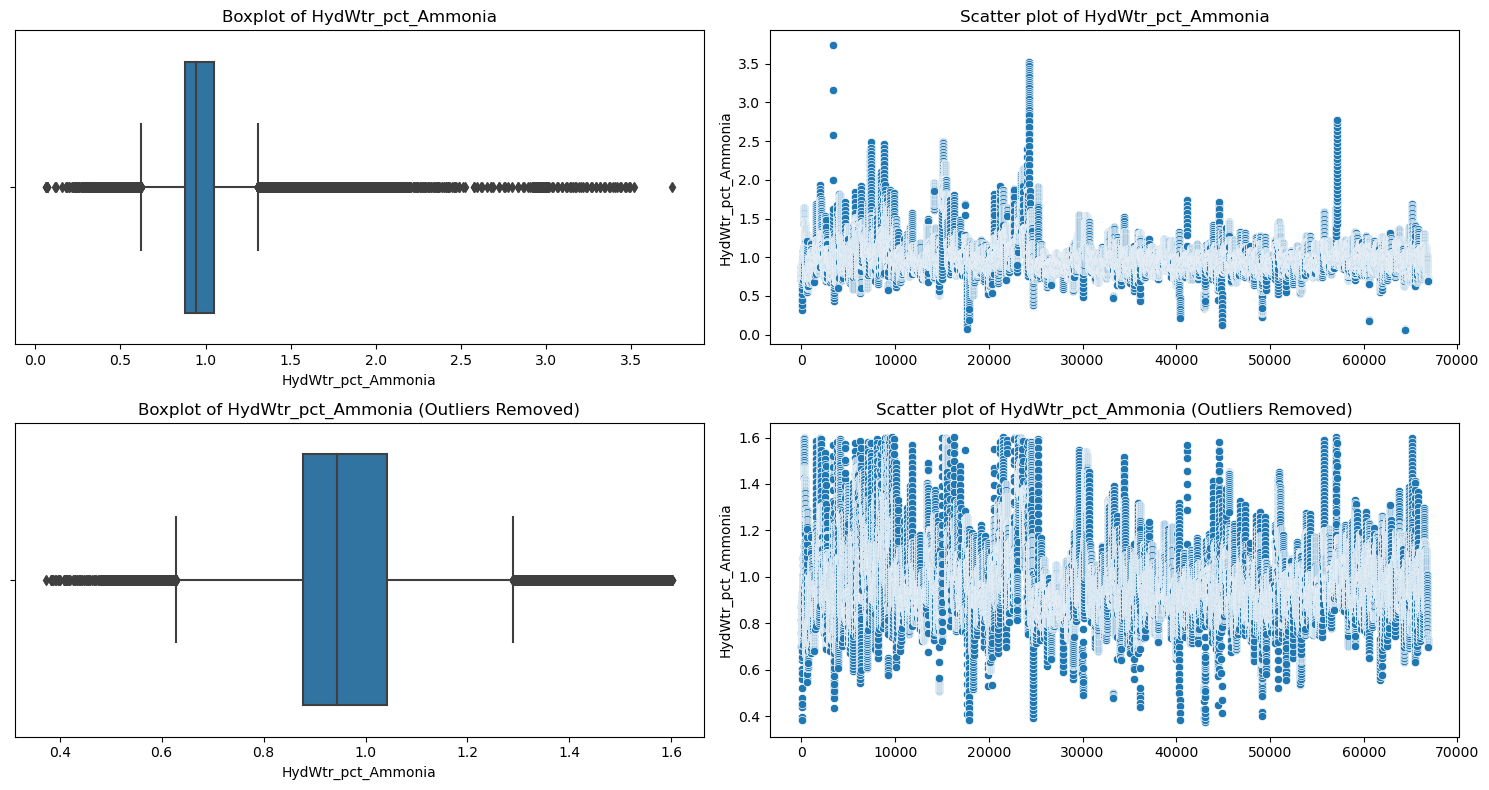

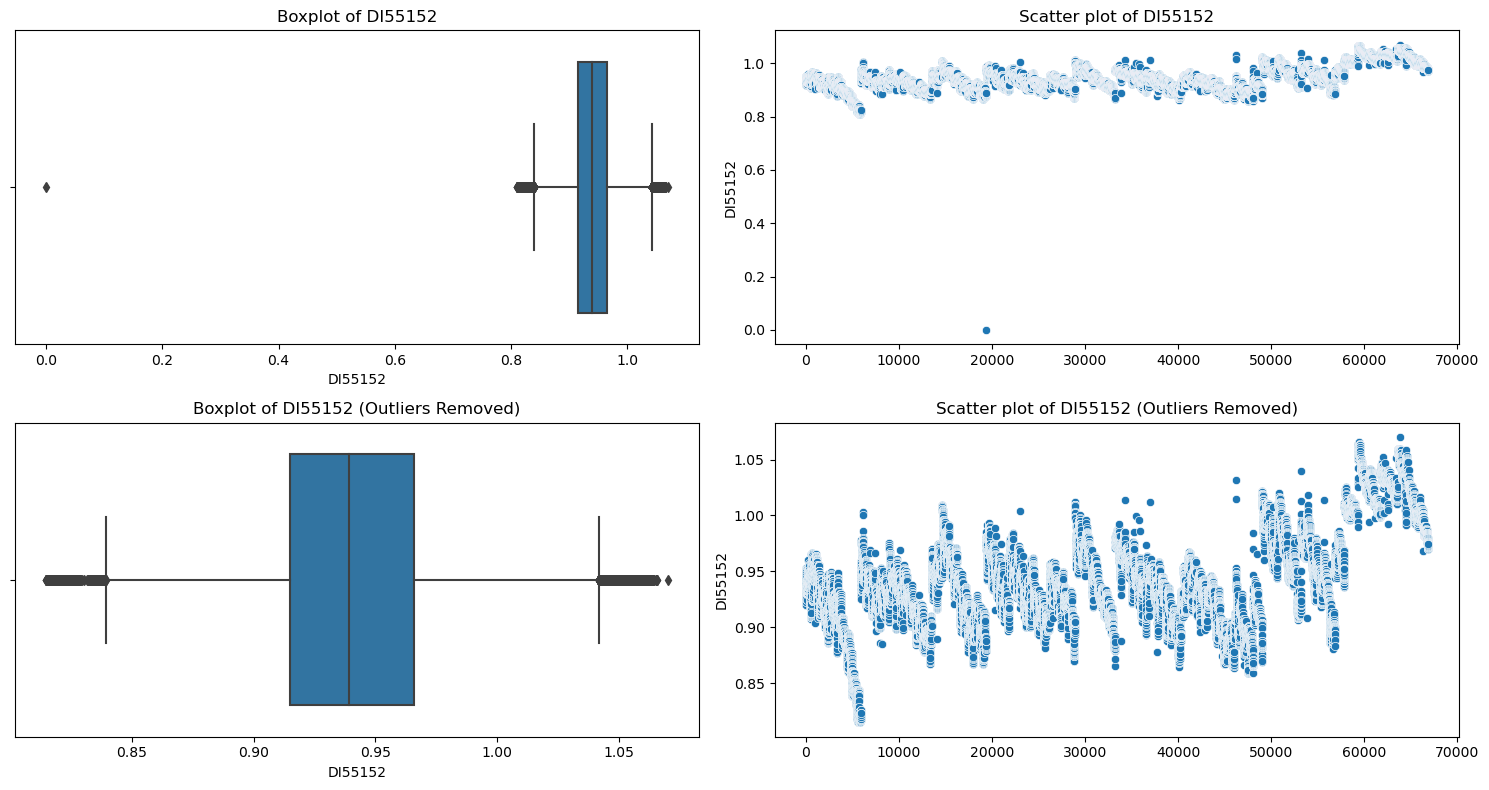

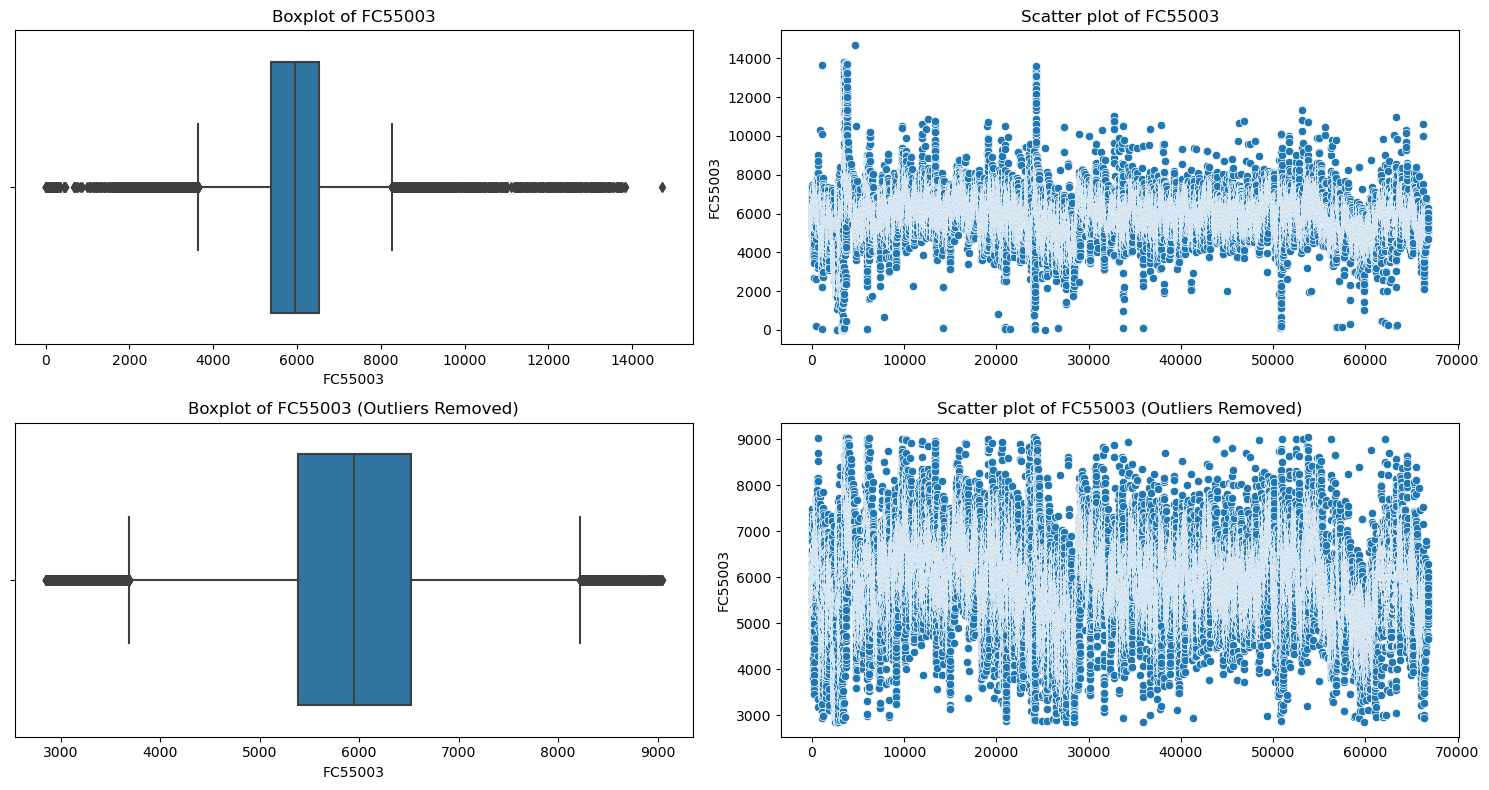

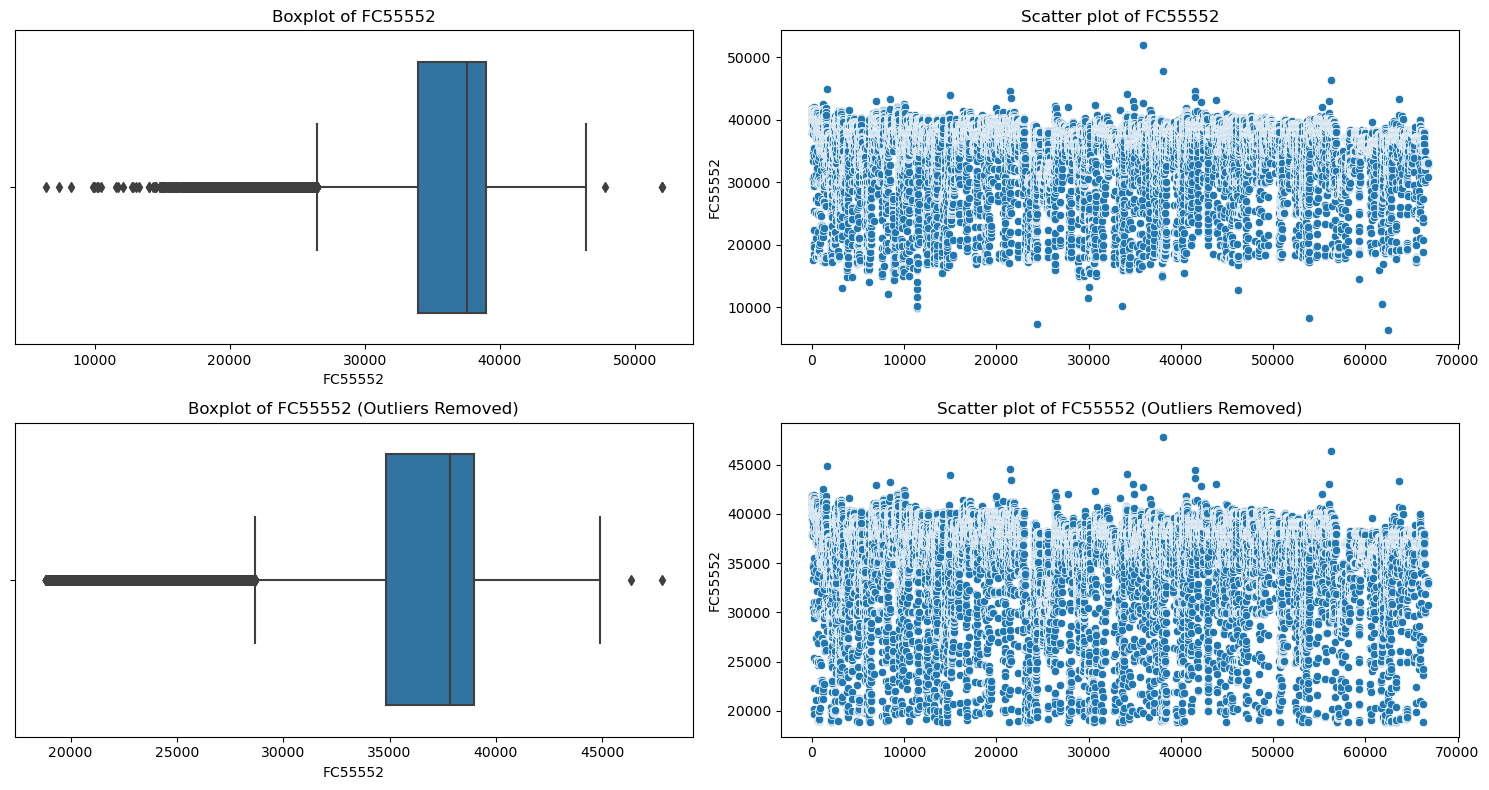

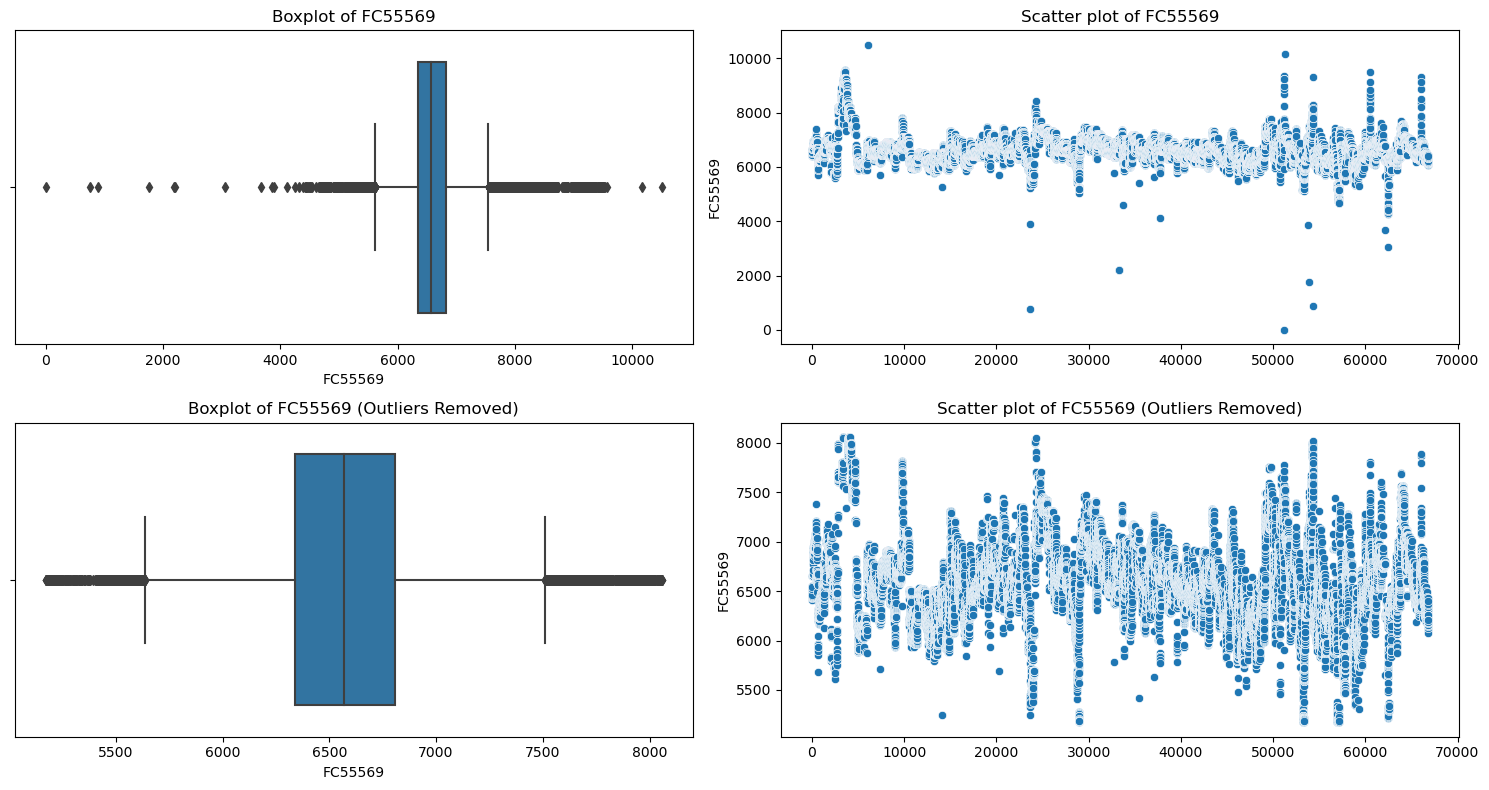

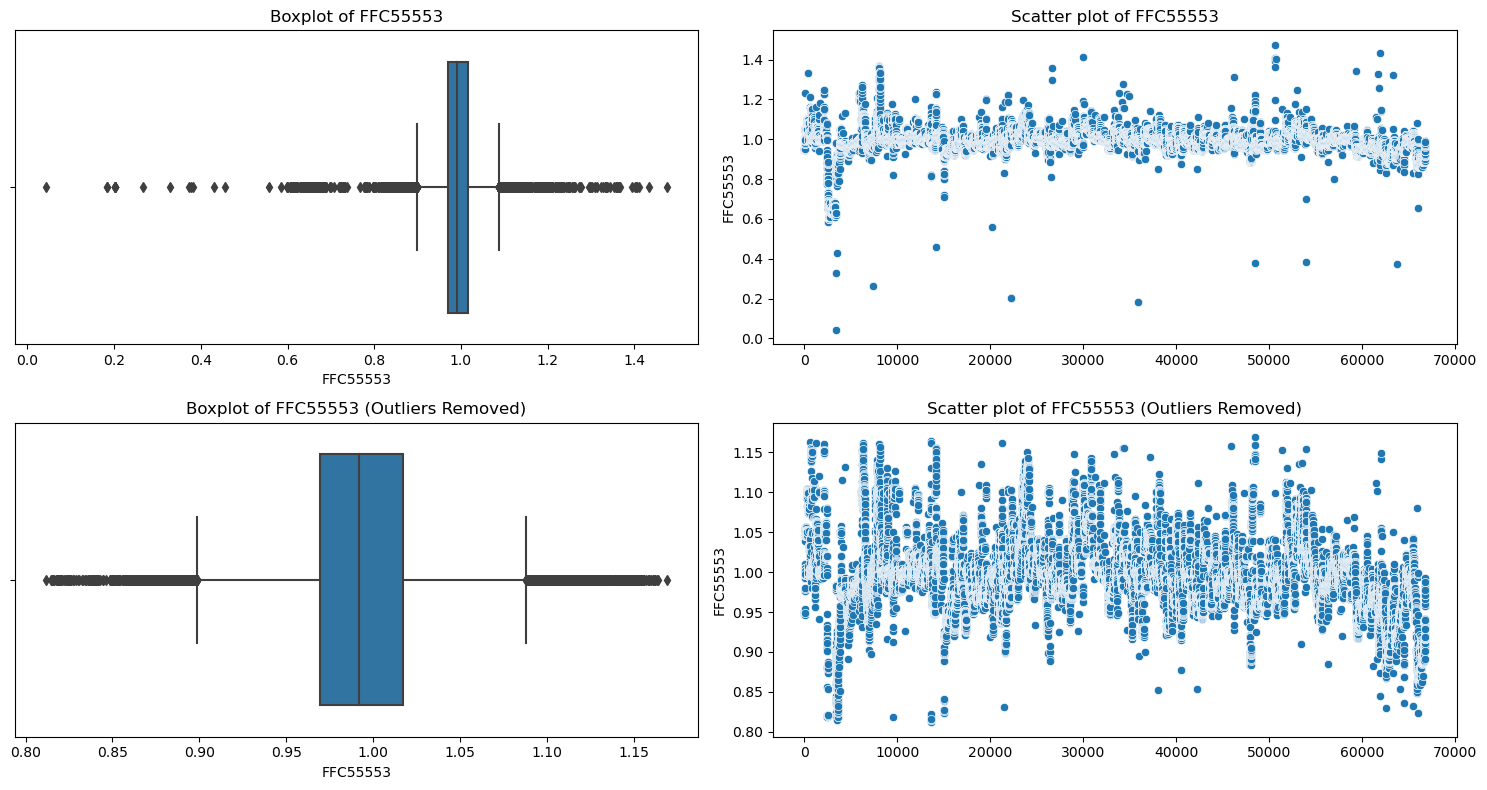

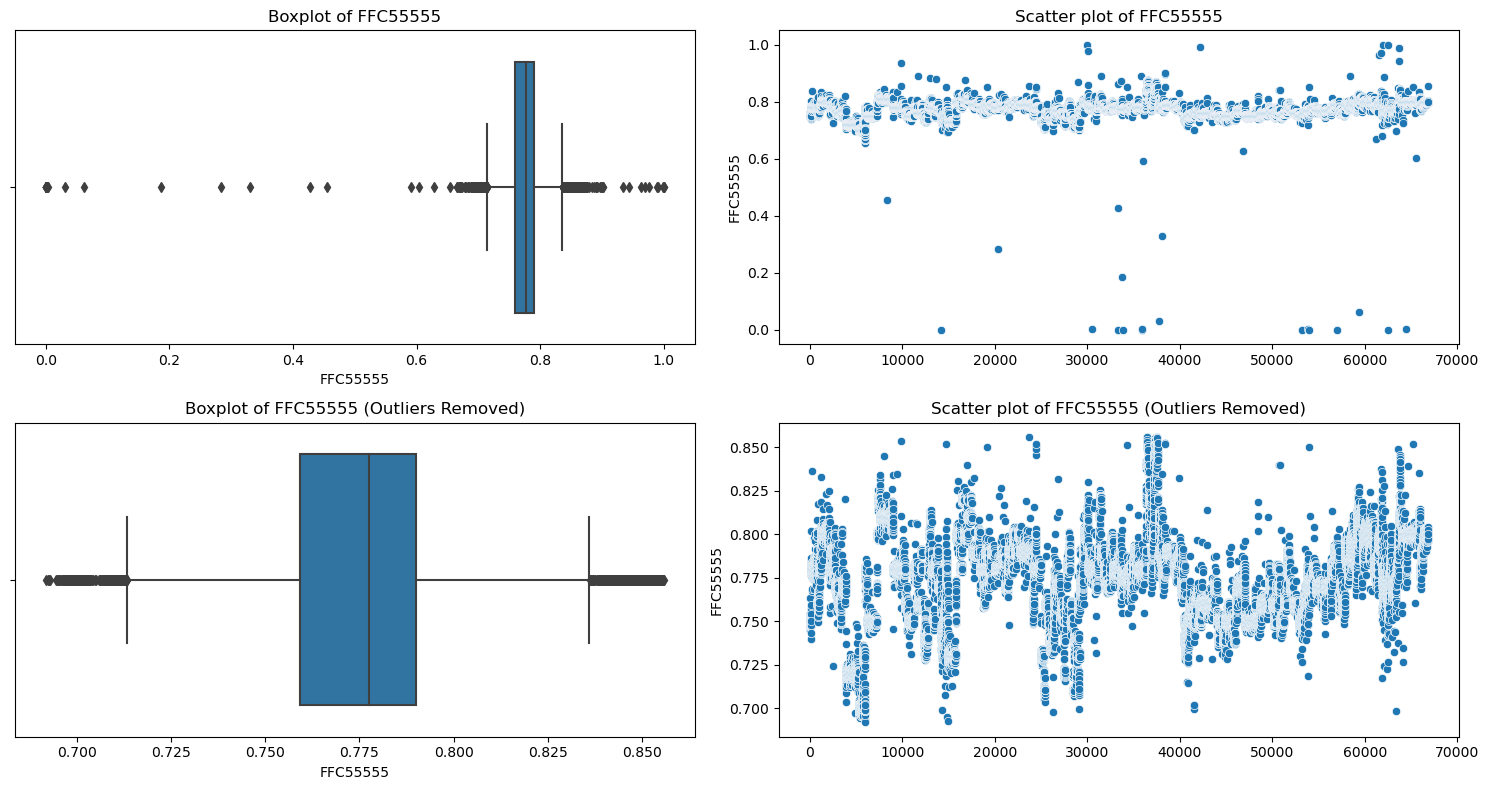

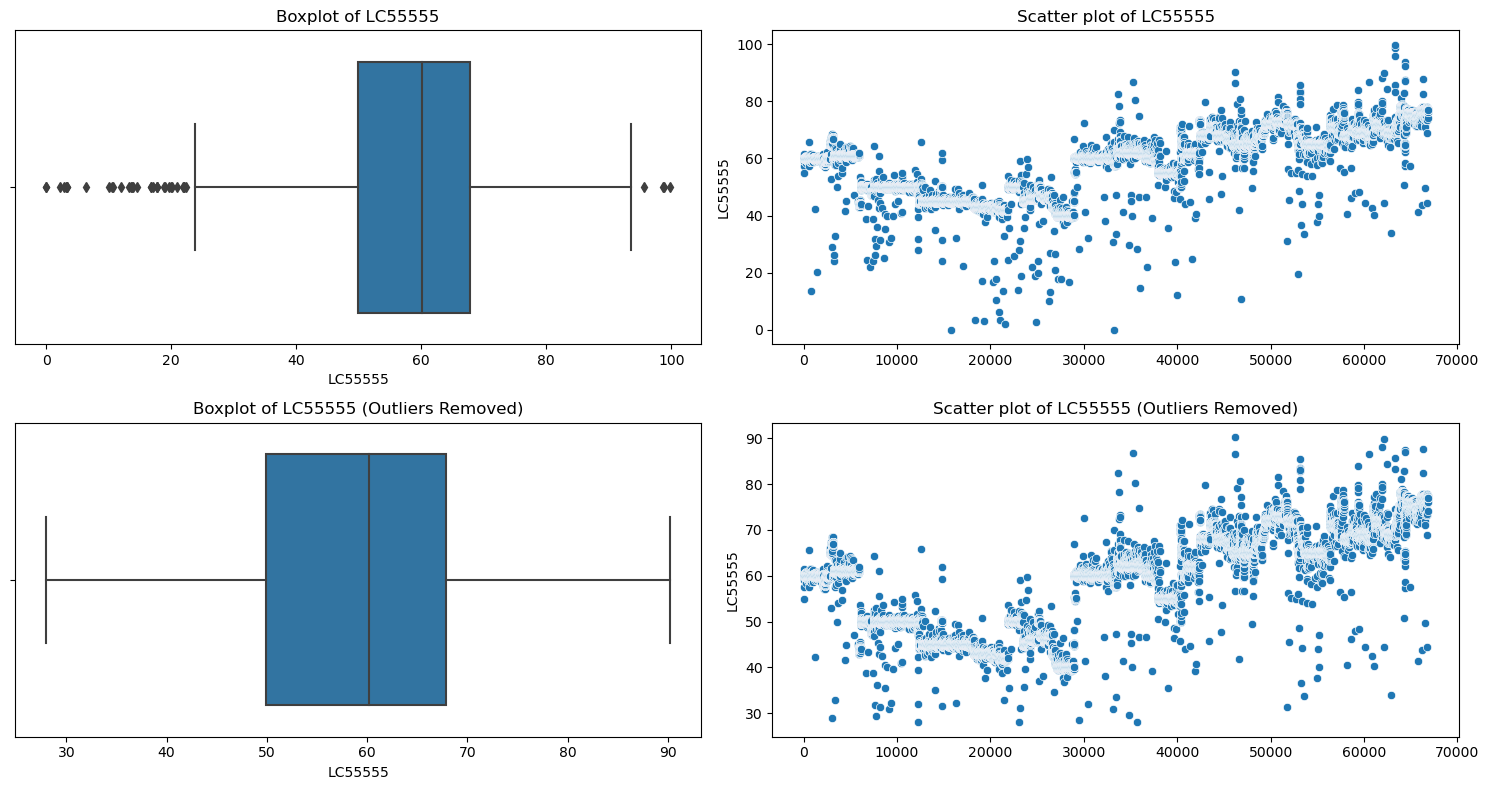

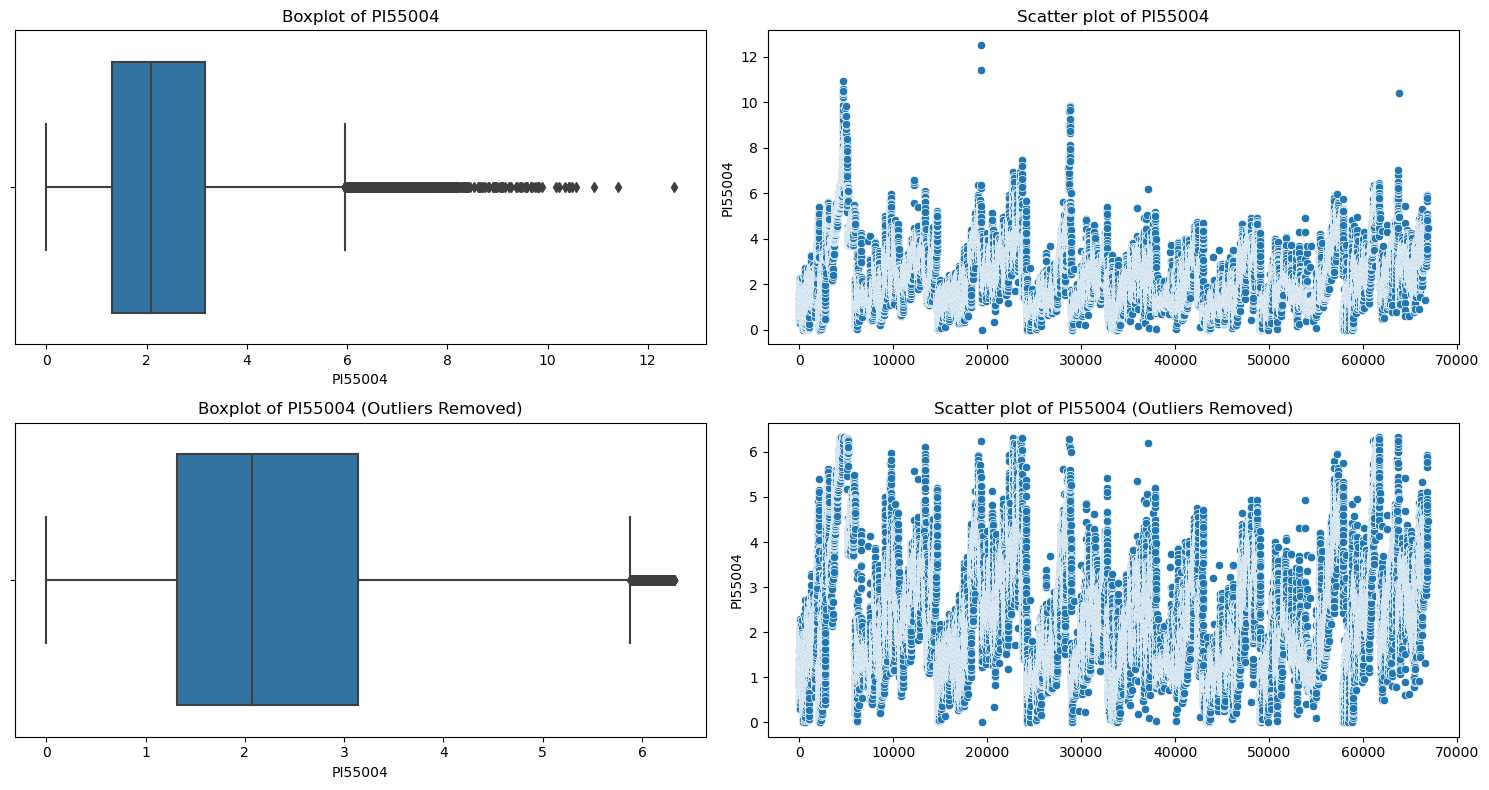

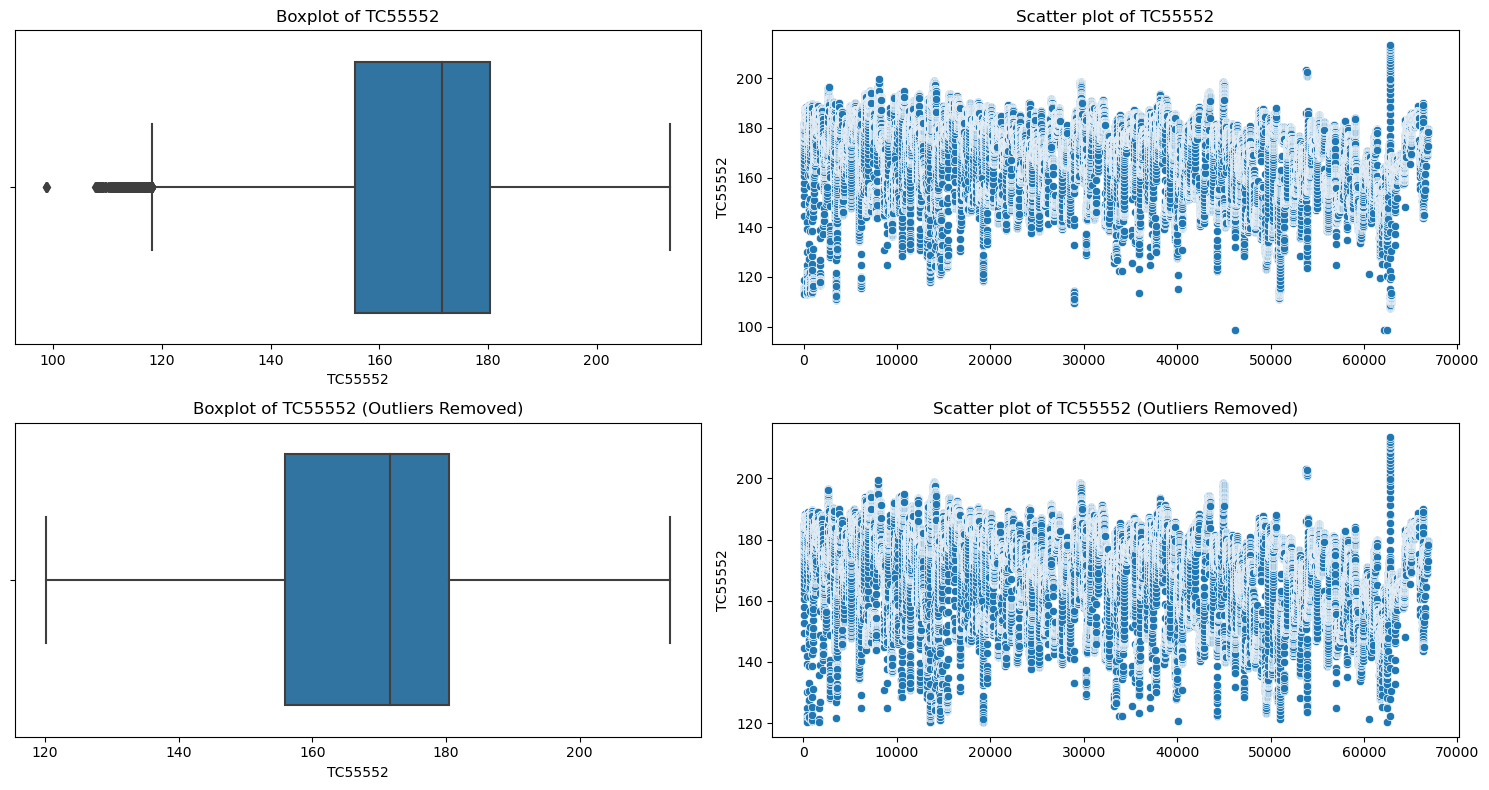

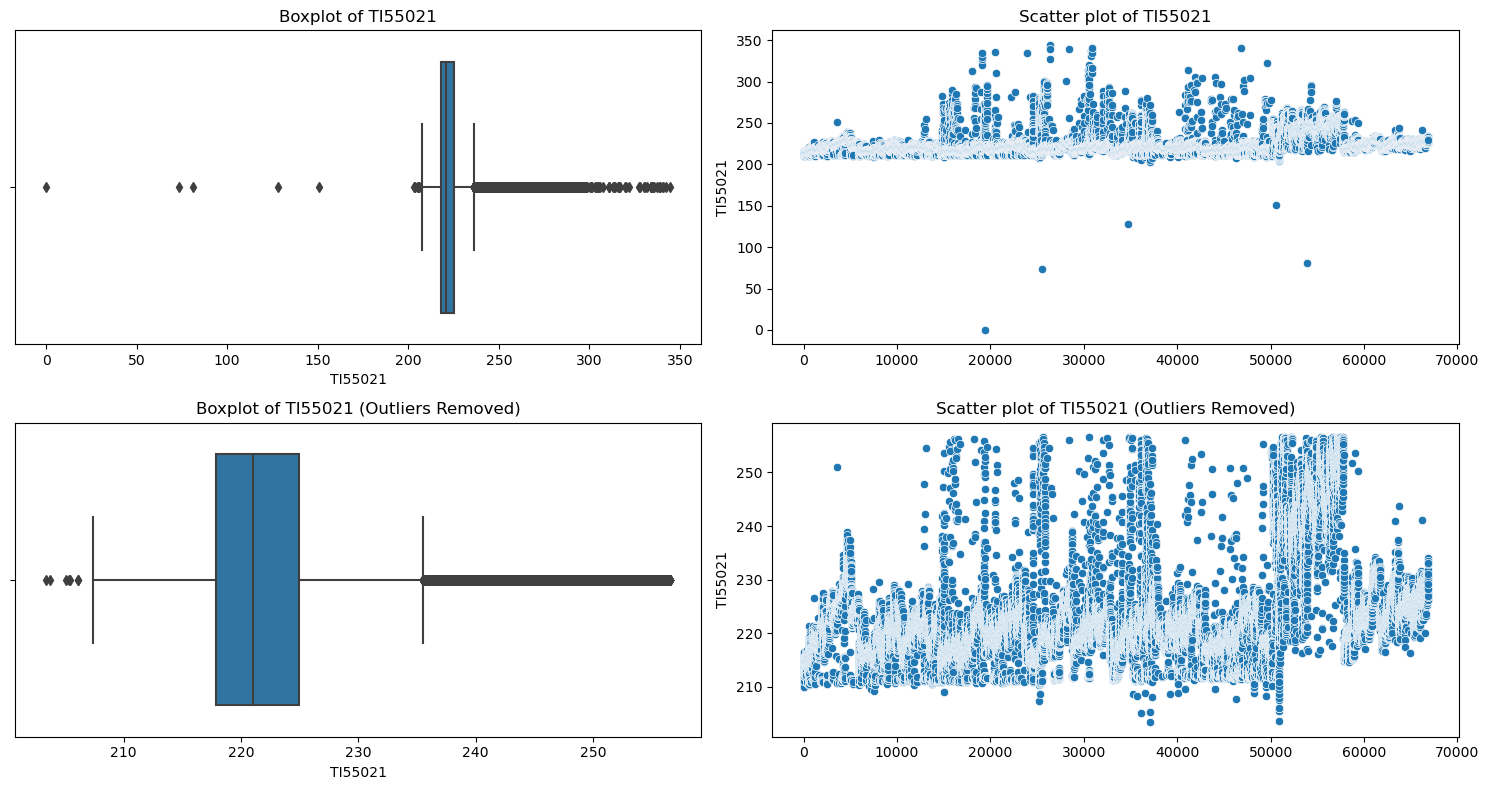

In [46]:

def plot_data(col, data):
    # Check for datetime column
    if pd.api.types.is_datetime64_any_dtype(data[col]):
        print(f"Skipping datetime column: {col}")
        return data[col], None

    # Remove outliers (> 3 standard deviations from the mean)
    mean_col = data[col].mean()
    std_col = data[col].std()
    filtered_col = data[col][((data[col] - mean_col) / std_col).abs() <= 3]

    plt.figure(figsize=(15, 8))

    plt.subplot(2, 2, 1)
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot of {col}")

    plt.subplot(2, 2, 2)
    sns.scatterplot(x=data[col].index, y=data[col])
    plt.title(f"Scatter plot of {col}")

    plt.subplot(2, 2, 3)
    sns.boxplot(x=filtered_col)
    plt.title(f"Boxplot of {col} (Outliers Removed)")

    plt.subplot(2, 2, 4)
    sns.scatterplot(x=filtered_col.index, y=filtered_col)
    plt.title(f"Scatter plot of {col} (Outliers Removed)")

    plt.tight_layout()
    plt.show()

    return data[col], filtered_col

# Initialize dictionaries to store data
df_plotted = {}
df_plotted_Outliers_removed = {}

# Loop through each column to plot the data
for col in df_outlierHandling.columns:
    plotted, plotted_filtered = plot_data(col, df_outlierHandling)
    df_plotted[col] = plotted
    if plotted_filtered is not None:
        df_plotted_Outliers_removed[col] = plotted_filtered

# Convert the dictionaries to DataFrames
df_plotted = pd.DataFrame(df_plotted)
df_plotted_Outliers_removed = pd.DataFrame(df_plotted_Outliers_removed)

# Ensure "Date" column is present in df_plotted_Outliers_removed
if "Date" in df_outlierHandling.columns and "Date" not in df_plotted_Outliers_removed.columns:
    df_plotted_Outliers_removed["Date"] = df_outlierHandling["Date"]


In [47]:
# def plot_data(col, data, remove_outliers=False):
#     if pd.api.types.is_datetime64_any_dtype(data[col]):
#         print(f"Skipping datetime column: {col}")
#         return data[col], data[col]  # keep datetime columns as they are

# def plot_data(col, data, remove_outliers=False):
#     if pd.api.types.is_datetime64_any_dtype(data[col]):
#         print(f"Skipping datetime column: {col}")
#         return data[col], None  # keep datetime columns as they are

#     # Remove outliers (> 3 standard deviations from the mean)
#     mean_col = data[col].mean()
#     std_col = data[col].std()
#     filtered_col = data[col][((data[col] - mean_col) / std_col).abs() <= 3]

#     plt.figure(figsize=(15, 8))

#     plt.subplot(2, 2, 1)
#     sns.boxplot(x=data[col])
#     plt.title(f"Boxplot of {col}")

#     plt.subplot(2, 2, 2)
#     sns.scatterplot(x=data[col].index, y=data[col])
#     plt.title(f"Scatter plot of {col}")

#     plt.subplot(2, 2, 3)
#     sns.boxplot(x=filtered_col)
#     plt.title(f"Boxplot of {col} (Outliers Removed)")

#     plt.subplot(2, 2, 4)
#     sns.scatterplot(x=filtered_col.index, y=filtered_col)
#     plt.title(f"Scatter plot of {col} (Outliers Removed)")

#     plt.tight_layout()
#     plt.show()

#     return data[col], filtered_col

# # Create empty dictionaries to hold the Series
# df_plotted = {}
# df_plotted_Outliers_removed = {}

# # Loop through each column to plot the data
# for col in df_outlierHandling.columns:
#     plotted, plotted_filtered = plot_data(col, df_outlierHandling, remove_outliers=True)
#     df_plotted[col] = plotted
#     if plotted_filtered is not None:
#         df_plotted_Outliers_removed[col] = plotted_filtered

# # Convert the dictionaries to DataFrames
# df_plotted = pd.DataFrame(df_plotted)
# df_plotted_Outliers_removed = pd.DataFrame(df_plotted_Outliers_removed)




In [48]:
df_outlierHandling = df_plotted_Outliers_removed.copy()







In [49]:
# Calculate the statistics for each column in df_outlierHandling
total_rows = len(df_outlierHandling)
non_nan_count = df_outlierHandling.count()
nan_count = df_outlierHandling.isnull().sum()
nan_percentage = (nan_count / total_rows) * 100

# Store these in a DataFrame
nan_stats = pd.DataFrame({
    'ID': df_outlierHandling.columns,
    'total_rows': total_rows,
    'non_nan_count': non_nan_count.values,
    'nan_count': nan_count.values,
    'nan_percentage': nan_percentage.values
})

print(nan_stats)

## Plot
#nan_stats.set_index('ID')['nan_percentage'].plot(kind='bar')
#plt.ylabel('Percentage of NaNs')
#plt.title('Percentage of NaNs in each column')
#plt.show()\

                    ID  total_rows  non_nan_count  nan_count  nan_percentage
0           425_pct_Al       66814          66791         23        0.034424
1              M_Value       66814          66477        337        0.504385
2           C4_pct_Eth       66814          66662        152        0.227497
3           C4_pct_H2O       66814          66345        469        0.701949
4              Butanol       66814          64660       2154        3.223875
5   HydWtr_pct_Ammonia       66814          65568       1246        1.864879
6              DI55152       66814          66746         68        0.101775
7              FC55003       66814          65936        878        1.314096
8              FC55552       66814          64699       2115        3.165504
9              FC55569       66814          65565       1249        1.869369
10            FFC55553       66814          65742       1072        1.604454
11            FFC55555       66814          66511        303        0.453498

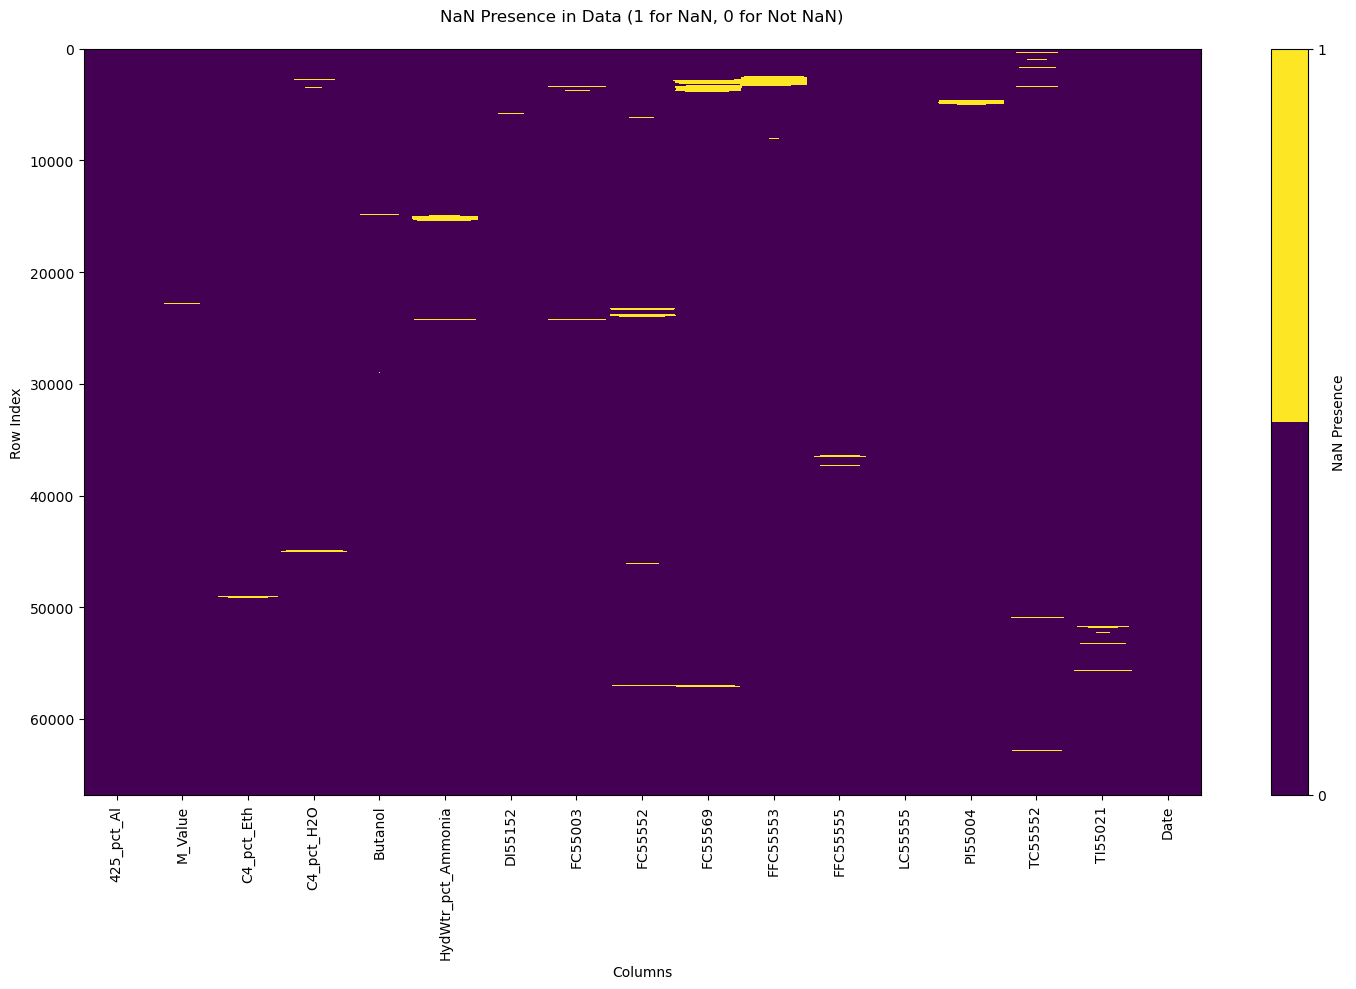

In [50]:


# Create a binary matrix to represent NaNs (1 for NaN, 0 for a number)
nan_matrix = np.where(df_outlierHandling.isna(), 1, 0)

fig, ax = plt.subplots(figsize=(15, 10))  # Adjust the size as needed
cmap = plt.get_cmap('viridis', 2)  # We use a colormap that differentiates between 0 and 1 clearly

# Plotting heatmap
cax = ax.imshow(nan_matrix, cmap=cmap, aspect='auto')

# Adding colorbar for reference
plt.colorbar(cax, ticks=[0, 1], label='NaN Presence')
plt.title("NaN Presence in Data (1 for NaN, 0 for Not NaN)", pad=20)

# To make the columns readable and vertical
plt.xticks(range(df_outlierHandling.shape[1]), df_outlierHandling.columns, rotation=90)  # rotation set to 90 for vertical labels

plt.xlabel('Columns')
plt.ylabel('Row Index')

plt.tight_layout()
plt.show()


In [51]:
df_outlierHandling = df_outlierHandling.dropna().copy()



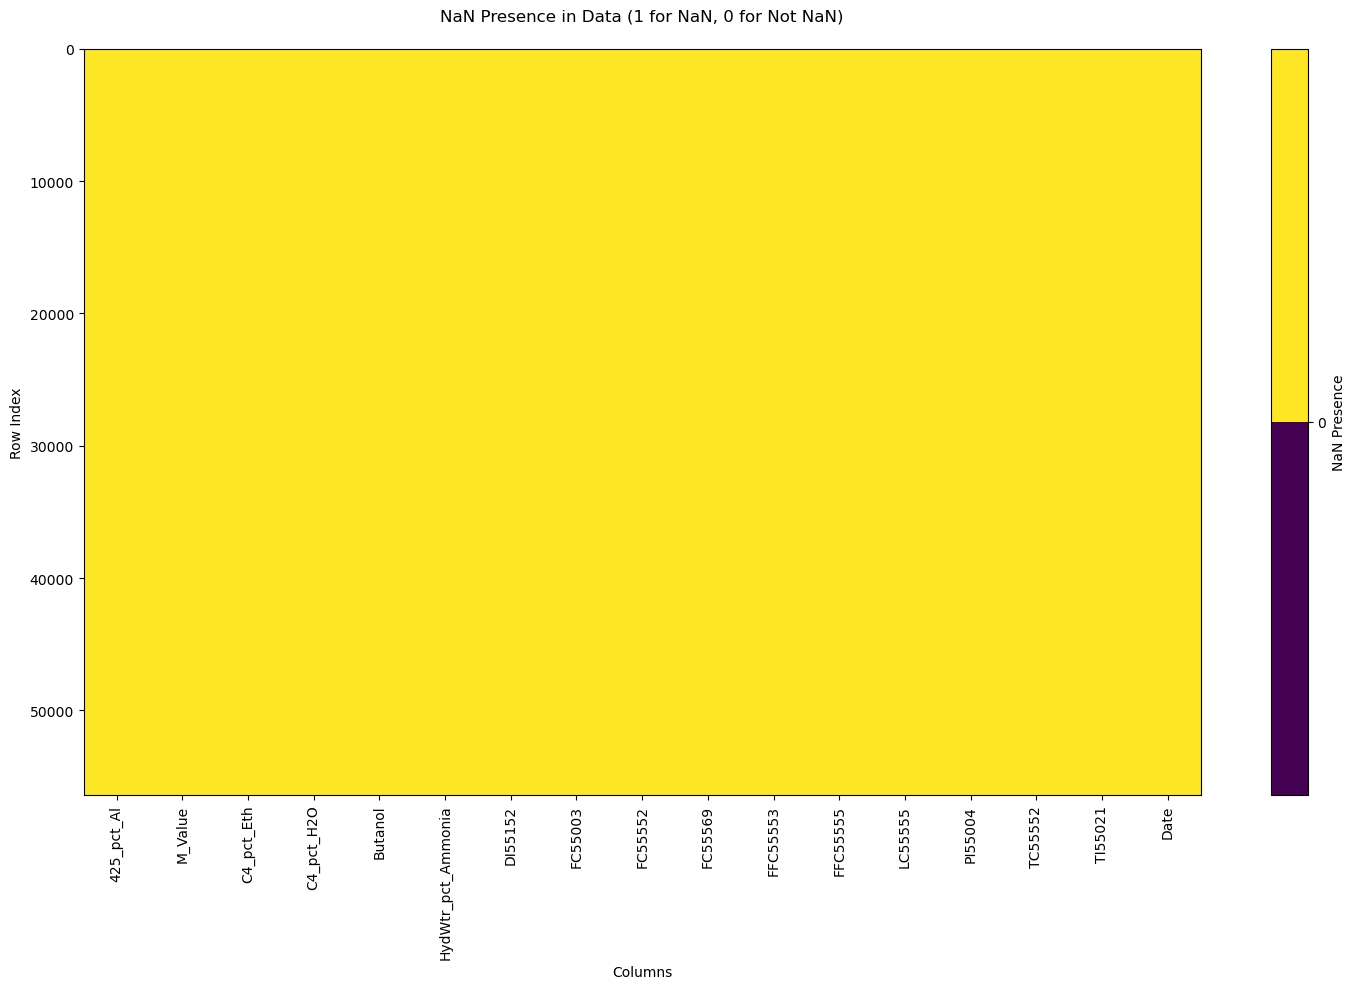

In [52]:


# Create a binary matrix to represent NaNs (1 for NaN, 0 for a number)
nan_matrix = np.where(df_outlierHandling.isna(), 1, 0)

fig, ax = plt.subplots(figsize=(15, 10))  # Adjust the size as needed
cmap = plt.get_cmap('viridis', 2)  # We use a colormap that differentiates between 0 and 1 clearly

# Plotting heatmap
cax = ax.imshow(nan_matrix, cmap=cmap, aspect='auto')

# Adding colorbar for reference
plt.colorbar(cax, ticks=[0, 1], label='NaN Presence')
plt.title("NaN Presence in Data (1 for NaN, 0 for Not NaN)", pad=20)

# To make the columns readable and vertical
plt.xticks(range(df_outlierHandling.shape[1]), df_outlierHandling.columns, rotation=90)  # rotation set to 90 for vertical labels

plt.xlabel('Columns')
plt.ylabel('Row Index')

plt.tight_layout()
plt.show()


In [53]:
# Calculate the statistics for each column in df_outlierHandling
total_rows = len(df_outlierHandling)
non_nan_count = df_outlierHandling.count()
nan_count = df_outlierHandling.isnull().sum()
nan_percentage = (nan_count / total_rows) * 100

# Store these in a DataFrame
nan_stats = pd.DataFrame({
    'ID': df_outlierHandling.columns,
    'total_rows': total_rows,
    'non_nan_count': non_nan_count.values,
    'nan_count': nan_count.values,
    'nan_percentage': nan_percentage.values
})

print(nan_stats)

## Plot
#nan_stats.set_index('ID')['nan_percentage'].plot(kind='bar')
#plt.ylabel('Percentage of NaNs')
#plt.title('Percentage of NaNs in each column')
#plt.show()\

                    ID  total_rows  non_nan_count  nan_count  nan_percentage
0           425_pct_Al       56390          56390          0             0.0
1              M_Value       56390          56390          0             0.0
2           C4_pct_Eth       56390          56390          0             0.0
3           C4_pct_H2O       56390          56390          0             0.0
4              Butanol       56390          56390          0             0.0
5   HydWtr_pct_Ammonia       56390          56390          0             0.0
6              DI55152       56390          56390          0             0.0
7              FC55003       56390          56390          0             0.0
8              FC55552       56390          56390          0             0.0
9              FC55569       56390          56390          0             0.0
10            FFC55553       56390          56390          0             0.0
11            FFC55555       56390          56390          0             0.0

In [54]:
# 48064 - Alc samples and Niro removed

num_columns = df_outlierHandling.shape[1]
print("Number of features:", num_columns)




Number of features: 17


## Add Columns to Describe Butanol and Decanol Content

Binary data must be added after Outlier handleing :) 

In [55]:
# Add new column 'B', with 1 if 'A' > 25, else 0
# df_outlierHandling['C4_Spec'] = np.where(df_outlierHandling['Butanol'] < 62, 1, 0)
# df_outlierHandling['C10_Spec'] = np.where(df_outlierHandling['Decanol'] < 5, 1, 0)

In [56]:
df_outlierHandling.to_csv('contData_clean.csv', index=False)

df_outlierHandling.columns

Index(['425_pct_Al', 'M_Value', 'C4_pct_Eth', 'C4_pct_H2O', 'Butanol',
       'HydWtr_pct_Ammonia', 'DI55152', 'FC55003', 'FC55552', 'FC55569',
       'FFC55553', 'FFC55555', 'LC55555', 'PI55004', 'TC55552', 'TI55021',
       'Date'],
      dtype='object')

In [57]:
saoSelect = ['Date', '425_pct_Al', 'M_Value', 'C4_pct_Eth', 'C4_pct_H2O','HydWtr_pct_Ammonia'] #, 'C4_pct_Hex', 'HydWtr_Na2O'

fb554Select = ['Date', 'Butanol'] # , 'Decanol', 'Ethanol', 'Hexanol', 'Octanol'

unitSelect = ['Date', 'AYC55580', 'DI55102', 'DI55152', 'DI55580', 'FC42428',
              'FC55003', 'FC55009', 'FC55102', 'FC55152', 'FC55552', 'FC55555', 'FC55569', 
              'FC55576', 'FFC55553', 'FFC55555', 'FYC55553', 'LC55553', 
              'LC55555', 'LC55557', 'LC55568', 'LC90366', 'LC90368', 'PI55004', 'PI55020', 
              'PI55560', 'TC55552', 'TC55553', 'TC55555', 'TC55566', 'TI40050', 
              'TI52014', 'TI55013', 'TI55014', 'TI55015', 'TI55016', 'TI55017', 'TI55021', 
              'TI55023']

            # ['Date', 'DI55152', 'FC55003', 'FC55552', 
            #   'FC55569', 'FFC55553', 'FFC55555', 'LC55555', 
            #   'PI55004', 'TC55552', 'TC55555', 'TI55021']

            # ['Date', 'DI55102', 'DI55152', 'DI55580', 'FC42428',
            #    'FC55003', 'FC55552', 'FC55569', 'FC55576', 'FFC55553', 'FFC55555',
            #    'LC52572', 'LC55553', 'LC55555', 'LC55557', 'LC55568', 'LC90366',
            #    'LC90368', 'PI55004', 'PI55020', 'TC55552', 'TC55553', 'TC55555']

            #   ['Date', 'AYC55580', 'DI55102', 'DI55152', 'DI55580', 'FC42428', 'FC52018',
            #   'FC55003', 'FC55009', 'FC55102', 'FC55152', 'FC55552', 'FC55555', 'FC55569', 
            #   'FC55576', 'FFC55553', 'FFC55555', 'FYC55553', 'II52554', 'LC52572', 'LC55553', 
            #   'LC55555', 'LC55557', 'LC55568', 'LC90366', 'LC90368', 'PI55004', 'PI55020', 
            #   'PI55560', 'TC52015', 'TC55552', 'TC55553', 'TC55555', 'TC55566', 'TI40050', 
            #   'TI52014', 'TI55013', 'TI55014', 'TI55015', 'TI55016', 'TI55017', 'TI55021', 
            #   'TI55023','VI52558B']

df_clean_554 = df_outlierHandling[fb554Select].copy()

df_clean_425 = df_outlierHandling[saoSelect].copy()

df_clean_unit = df_outlierHandling[unitSelect].copy()



df_clean_554.to_csv('cont_554Data_clean.csv', index=False)

df_clean_425.to_csv('cont_425Data_clean.csv', index=False)

df_clean_unit.to_csv('cont_unitData_clean.csv', index=False)

KeyError: "['AYC55580', 'DI55102', 'DI55580', 'FC42428', 'FC55009', 'FC55102', 'FC55152', 'FC55555', 'FC55576', 'FYC55553', 'LC55553', 'LC55557', 'LC55568', 'LC90366', 'LC90368', 'PI55020', 'PI55560', 'TC55553', 'TC55555', 'TC55566', 'TI40050', 'TI52014', 'TI55013', 'TI55014', 'TI55015', 'TI55016', 'TI55017', 'TI55023'] not in index"